In [1]:
import random
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
d1=[]
d2=[]
d3=[]
for i in range(50000):
    x=random.random()
    d1.append(x)
    y=random.random()
    d2.append(y)
    d3.append(x+y)
    
# Initializing dependent and independent(target) variables

In [3]:
df=pd.DataFrame({'x1':d1,'x2':d2,'x3':d3},index=range(0,50000))
df.head()
# Taking the variables in dataframe

,x1,x2,x3
0,0.059411,0.834607,0.894018
1,0.870221,0.491276,1.361497
2,0.801795,0.232707,1.034501
3,0.816664,0.913883,1.730548
4,0.117772,0.621719,0.739491


In [4]:
X = df.iloc[:,0:2]
Y = df.iloc[:,2]
print(X)
print(Y)
# Train/Test Split

             x1        x2
0      0.059411  0.834607
1      0.870221  0.491276
2      0.801795  0.232707
3      0.816664  0.913883
4      0.117772  0.621719
5      0.503689  0.767945
6      0.365743  0.578018
7      0.162220  0.631907
8      0.095921  0.002349
9      0.436816  0.072943
10     0.434769  0.528028
11     0.481297  0.559473
12     0.434310  0.836751
13     0.920640  0.039686
14     0.527959  0.635921
15     0.003798  0.691879
16     0.864083  0.341574
17     0.923065  0.299214
18     0.924556  0.939868
19     0.515099  0.518086
20     0.448509  0.346903
21     0.800368  0.319255
22     0.569277  0.653428
23     0.250729  0.357096
24     0.464663  0.664947
25     0.003128  0.179488
26     0.761388  0.181988
27     0.804965  0.657761
28     0.555238  0.815213
29     0.644794  0.344877
...         ...       ...
49970  0.418122  0.235569
49971  0.426942  0.019889
49972  0.594112  0.653001
49973  0.105142  0.214399
49974  0.516534  0.570724
49975  0.025462  0.125615
49976  0.643

In [5]:
def get_model():    
    
    model = Sequential()
    model.add(Dense(2, input_dim=2, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer='adagrad')
    return model

# Creating Neural Network model

In [6]:
model = get_model()

In [7]:
model.fit(X, Y, epochs=100)

# Fitting the Variables to train

Epoch 1/100
50000/50000 [==============================] - 3s 56us/step - loss: 0.4334
Epoch 2/100
50000/50000 [==============================] - 2s 31us/step - loss: 0.0478
Epoch 3/100
50000/50000 [==============================] - 1s 28us/step - loss: 0.0010
Epoch 4/100
50000/50000 [==============================] - 1s 27us/step - loss: 9.0806e-05
Epoch 5/100
50000/50000 [==============================] - 2s 32us/step - loss: 3.0260e-05
Epoch 6/100
50000/50000 [==============================] - 1s 27us/step - loss: 1.5400e-05
Epoch 7/100
50000/50000 [==============================] - 1s 27us/step - loss: 9.5250e-06
Epoch 8/100
50000/50000 [==============================] - 1s 27us/step - loss: 6.5672e-06
Epoch 9/100
50000/50000 [==============================] - 1s 30us/step - loss: 4.8418e-06
Epoch 10/100
50000/50000 [==============================] - 2s 33us/step - loss: 3.7047e-06
Epoch 11/100
50000/50000 [==============================] - 1s 27us/step - loss: 2.9244e-06
Epoch 12/

50000/50000 [==============================] - 1s 29us/step - loss: 2.3308e-08
Epoch 91/100
50000/50000 [==============================] - 2s 43us/step - loss: 2.2657e-08
Epoch 92/100
50000/50000 [==============================] - 2s 31us/step - loss: 2.2032e-08
Epoch 93/100
50000/50000 [==============================] - 2s 31us/step - loss: 2.1456e-08
Epoch 94/100
50000/50000 [==============================] - 1s 25us/step - loss: 2.0864e-08
Epoch 95/100
50000/50000 [==============================] - 1s 24us/step - loss: 2.0328e-08
Epoch 96/100
50000/50000 [==============================] - 1s 24us/step - loss: 1.9779e-08
Epoch 97/100
50000/50000 [==============================] - 1s 25us/step - loss: 1.9270e-08
Epoch 98/100
50000/50000 [==============================] - 1s 25us/step - loss: 1.8790e-08
Epoch 99/100
50000/50000 [==============================] - 1s 24us/step - loss: 1.8292e-08
Epoch 100/100
50000/50000 [==============================] - 1s 24us/step - loss: 1.7833e-08


In [8]:
scores = model.evaluate(X, Y)
scores

50000/50000 [==============================] - 1s 14us/step


1.7580970075719016e-08

In [9]:
y_pred=model.predict(X)
y_pred

# Predicting the target values

array([[ 0.89401025],
       [ 1.36151111],
       [ 1.03451836],
       ..., 
       [ 0.59919339],
       [ 1.49227881],
       [ 1.24804068]], dtype=float32)

In [10]:
from sklearn.metrics import accuracy_score,r2_score

In [11]:
r2_score(y_pred, Y)

# Checking the accuracy of the predicted values with respect to the actual values

0.9999998942503131

# Plotting Loss vs Iteration

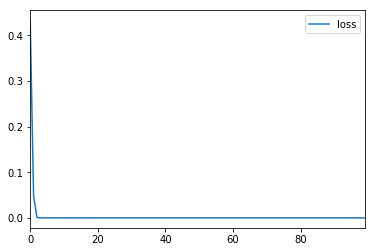

In [12]:
metrics_df = pd.DataFrame(model.history.history)
metrics_df.plot()